In [1]:
from Algorithm import Gaussian_Process
from Algorithm import LA_Bayessian_Quadrature
from Algorithm import Mesh
from Algorithm import Kernels
import Target_Function as tf

import numpy as np
import matplotlib.pyplot as plt

In [2]:
opt_spy  = tf.Option('call', 0, 600, 0.1672, 0.15,  1, 100)   # SPDR S&P 500 ETF  (广义市场基准)
opt_aapl = tf.Option('call', 1, 200, 0.2613, 0.49,  1, 100)   # Apple
opt_tsla = tf.Option('call', 2, 350, 0.6398, 0.57,  1, 100)   # Tesla
opt_nvda = tf.Option('call', 3, 145, 0.3482, 0.24,  1, 100)   # NVIDIA
opt_amzn = tf.Option('call', 4, 210, 0.2902, 0.24,  1, 100)   # Amazon
opt_meta = tf.Option('call', 5, 700, 0.2924, 0.24,  1, 100)   # Meta
opt_msft = tf.Option('call', 6, 485, 0.1817, 0.15,  1, 100)   # Microsoft
opt_goog = tf.Option('call', 7, 165, 0.3226, 0.32,  1, 100)   # Google
opt_amd  = tf.Option('call', 8, 130, 0.4065, 0.32,  1, 100)   # AMD
opt_mstr = tf.Option('call', 9, 370, 0.5098, 0.49,  1, 100)   # MicroStrategy

In [3]:
def LABQ_alter(D):
    options = [opt_spy, opt_aapl, opt_tsla, opt_nvda, opt_amzn,
               opt_meta, opt_msft, opt_goog, opt_amd, opt_mstr]
    portfolio = tf.OptionPortfolio(
        0.04,50,900,
        options[:D]
    )
    D = len(portfolio.options)
    func = portfolio.target_function
    aaa = np.array([np.zeros(D)])
    X = Mesh.get_points_Sobol(aaa,0,D)
    Y = np.array([func(x) for x in X])
    beta = np.concatenate([
    np.array([-0.5]),
    np.random.uniform(-2, 0, size=11 * D)
    ])
    mesh1 = Mesh.get_points_Sobol(X,_)
    GP = Gaussian_Process.GaussianProcess(Kernels.K_lin_mat2_10,beta,X,Y,mesh = mesh1)
    sobol = [3,3,3,3,3,3,3]
    a, b, times, uncertainties = LA_Bayessian_Quadrature.ABC_D_alter(
        func,
        GP,
        Mesh.get_points_Sobol,
        rate = 0.05,
        min_n = 10,
        max_n = 100,
        lambd = [30, 1],
        point_mesh = mesh1,
        sobol = sobol[D-2] #2^sobol points
    )
    return times,uncertainties

In [4]:
t = []
un = []

In [5]:
ti, unce = LABQ_alter(2)
t.append(ti)
un.append(unce)

Dimensions: 2 , Sobol: 3
Step 1, Time: 10.26, Result: [0.42831775 0.03815331], Uncertainty Rate: 45.60%
Step 2, Time: 6.53, Result: [0.4462614  0.01720051], Uncertainty Rate: 29.39%
Step 3, Time: 6.57, Result: [0.48003427 0.01225684], Uncertainty Rate: 23.06%
Step 4, Time: 6.84, Result: [0.52940945 0.00791726], Uncertainty Rate: 16.81%
Step 5, Time: 6.26, Result: [0.53652282 0.00506568], Uncertainty Rate: 13.27%
Step 6, Time: 6.98, Result: [0.55534734 0.00360768], Uncertainty Rate: 10.82%
Step 7, Time: 7.09, Result: [0.56078918 0.00215129], Uncertainty Rate: 8.27%
Step 8, Time: 6.81, Result: [0.57510662 0.00186678], Uncertainty Rate: 7.51%
Step 9, Time: 6.36, Result: [0.5779444  0.00150993], Uncertainty Rate: 6.72%
Step 10, Time: 6.68, Result: [0.5887535  0.00135186], Uncertainty Rate: 6.24%
Step 11, Time: 6.42, Result: [0.58391204 0.00114071], Uncertainty Rate: 5.78%
Step 12, Time: 6.40, Result: [0.57921548 0.00094027], Uncertainty Rate: 5.29%
Step 13, Time: 6.98, Result: [0.57785685 

In [6]:
ti, unce = LABQ_alter(3)
t.append(ti)
un.append(unce)

Dimensions: 3 , Sobol: 3
Step 1, Time: 16.27, Result: [0.35920638 0.01136596], Uncertainty Rate: 29.68%
Step 2, Time: 11.03, Result: [0.38106411 0.00884871], Uncertainty Rate: 24.69%
Step 3, Time: 11.83, Result: [0.41738735 0.00788224], Uncertainty Rate: 21.27%
Step 4, Time: 9.68, Result: [0.42942102 0.00668821], Uncertainty Rate: 19.04%
Step 5, Time: 12.71, Result: [0.43741231 0.0056321 ], Uncertainty Rate: 17.16%
Step 6, Time: 12.24, Result: [0.44523727 0.00503643], Uncertainty Rate: 15.94%
Step 7, Time: 17.83, Result: [0.46192972 0.00450137], Uncertainty Rate: 14.52%
Step 8, Time: 11.50, Result: [0.47802386 0.00391513], Uncertainty Rate: 13.09%
Step 9, Time: 11.24, Result: [0.48831092 0.00344326], Uncertainty Rate: 12.02%
Step 10, Time: 12.05, Result: [0.48994014 0.00308458], Uncertainty Rate: 11.34%
Step 11, Time: 11.42, Result: [0.50976904 0.00302506], Uncertainty Rate: 10.79%
Step 12, Time: 11.43, Result: [0.51001732 0.00271458], Uncertainty Rate: 10.22%
Step 13, Time: 12.64, Res

In [7]:
ti, unce = LABQ_alter(4)
t.append(ti)
un.append(unce)

Dimensions: 4 , Sobol: 3
Step 1, Time: 23.80, Result: [0.35535273 0.00753094], Uncertainty Rate: 24.42%
Step 2, Time: 15.76, Result: [0.36790578 0.00663135], Uncertainty Rate: 22.13%
Step 3, Time: 16.32, Result: [0.37407209 0.00602528], Uncertainty Rate: 20.75%
Step 4, Time: 15.61, Result: [0.38417252 0.00556201], Uncertainty Rate: 19.41%
Step 5, Time: 15.33, Result: [0.39081345 0.00505932], Uncertainty Rate: 18.20%
Step 6, Time: 14.50, Result: [0.40166865 0.00476125], Uncertainty Rate: 17.18%
Step 7, Time: 16.85, Result: [0.4074121  0.00441851], Uncertainty Rate: 16.32%
Step 8, Time: 15.88, Result: [0.41190049 0.00417363], Uncertainty Rate: 15.68%
Step 9, Time: 15.39, Result: [0.42229615 0.00389963], Uncertainty Rate: 14.79%
Step 10, Time: 16.91, Result: [0.42648564 0.00368183], Uncertainty Rate: 14.23%
Step 11, Time: 16.04, Result: [0.43878722 0.00357235], Uncertainty Rate: 13.62%
Step 12, Time: 14.44, Result: [0.44904136 0.00339561], Uncertainty Rate: 12.98%
Step 13, Time: 19.63, Re

In [8]:
ti, unce = LABQ_alter(5)
t.append(ti)
un.append(unce)

Dimensions: 5 , Sobol: 3
Step 1, Time: 40.27, Result: [0.34139051 0.0038826 ], Uncertainty Rate: 18.25%
Step 2, Time: 24.32, Result: [0.34806487 0.00360656], Uncertainty Rate: 17.25%
Step 3, Time: 25.02, Result: [0.34967527 0.00348151], Uncertainty Rate: 16.87%
Step 4, Time: 19.40, Result: [0.3599174 0.00342  ], Uncertainty Rate: 16.25%
Step 5, Time: 19.80, Result: [0.36367208 0.00334707], Uncertainty Rate: 15.91%
Step 6, Time: 20.92, Result: [0.37390743 0.00321858], Uncertainty Rate: 15.17%
Step 7, Time: 19.66, Result: [0.37795302 0.0031553 ], Uncertainty Rate: 14.86%
Step 8, Time: 19.23, Result: [0.38735962 0.00307883], Uncertainty Rate: 14.32%
Step 9, Time: 20.14, Result: [0.38995848 0.00299162], Uncertainty Rate: 14.03%
Step 10, Time: 24.13, Result: [0.39628058 0.00275101], Uncertainty Rate: 13.24%
Step 11, Time: 24.73, Result: [0.39681203 0.00262673], Uncertainty Rate: 12.92%
Step 12, Time: 19.44, Result: [0.39995615 0.00258505], Uncertainty Rate: 12.71%
Step 13, Time: 20.29, Resu

In [9]:
ti, unce = LABQ_alter(6)
t.append(ti)
un.append(unce)

Dimensions: 6 , Sobol: 3
Step 1, Time: 56.67, Result: [0.27437728 0.00161572], Uncertainty Rate: 14.65%
Step 2, Time: 26.77, Result: [0.27643119 0.00157885], Uncertainty Rate: 14.37%
Step 3, Time: 30.77, Result: [0.27673073 0.00155711], Uncertainty Rate: 14.26%
Step 4, Time: 31.98, Result: [0.2766489  0.00154029], Uncertainty Rate: 14.19%
Step 5, Time: 29.86, Result: [0.27954044 0.00152388], Uncertainty Rate: 13.96%
Step 6, Time: 30.90, Result: [0.28238343 0.00150786], Uncertainty Rate: 13.75%
Step 7, Time: 25.85, Result: [0.28586715 0.00149143], Uncertainty Rate: 13.51%
Step 8, Time: 31.21, Result: [0.28607201 0.00147985], Uncertainty Rate: 13.45%
Step 9, Time: 27.01, Result: [0.28752419 0.00145702], Uncertainty Rate: 13.28%
Step 10, Time: 25.88, Result: [0.2896505  0.00144111], Uncertainty Rate: 13.11%
Step 11, Time: 31.94, Result: [0.29168335 0.00143002], Uncertainty Rate: 12.96%
Step 12, Time: 44.09, Result: [0.29547202 0.00140176], Uncertainty Rate: 12.67%
Step 13, Time: 40.12, Re

In [10]:
ti, unce = LABQ_alter(7)
t.append(ti)
un.append(unce)

Dimensions: 7 , Sobol: 3
Step 1, Time: 153.09, Result: [0.2468048  0.00073138], Uncertainty Rate: 10.96%
Step 2, Time: 50.10, Result: [0.2477218  0.00072212], Uncertainty Rate: 10.85%
Step 3, Time: 58.84, Result: [0.24936397 0.00071749], Uncertainty Rate: 10.74%
Step 4, Time: 46.36, Result: [0.25112228 0.0007134 ], Uncertainty Rate: 10.64%
Step 5, Time: 59.74, Result: [0.25288912 0.00070975], Uncertainty Rate: 10.53%
Step 6, Time: 40.55, Result: [0.25419655 0.00070365], Uncertainty Rate: 10.44%
Step 7, Time: 54.25, Result: [0.25559552 0.00069918], Uncertainty Rate: 10.35%
Step 8, Time: 52.70, Result: [0.25650268 0.00069643], Uncertainty Rate: 10.29%
Step 9, Time: 67.85, Result: [0.25793387 0.00069174], Uncertainty Rate: 10.20%
Step 10, Time: 49.23, Result: [0.25852053 0.0006875 ], Uncertainty Rate: 10.14%
Step 11, Time: 51.06, Result: [0.25995874 0.00068344], Uncertainty Rate: 10.06%
Step 12, Time: 51.57, Result: [0.2610081  0.00068085], Uncertainty Rate: 10.00%
Step 13, Time: 41.82, R

In [11]:
ti, unce = LABQ_alter(8)
t.append(ti)
un.append(unce)

Dimensions: 8 , Sobol: 3
Step 1, Time: 471.24, Result: [0.23867469 0.00029466], Uncertainty Rate: 7.19%
Step 2, Time: 204.66, Result: [0.23939688 0.00029347], Uncertainty Rate: 7.16%
Step 3, Time: 162.92, Result: [0.24017711 0.00029255], Uncertainty Rate: 7.12%
Step 4, Time: 178.89, Result: [0.24066808 0.00029144], Uncertainty Rate: 7.09%
Step 5, Time: 183.88, Result: [0.24161454 0.00029078], Uncertainty Rate: 7.06%
Step 6, Time: 165.14, Result: [0.24217014 0.00028969], Uncertainty Rate: 7.03%
Step 7, Time: 108.23, Result: [0.24260504 0.00028888], Uncertainty Rate: 7.01%
Step 8, Time: 171.30, Result: [0.24301324 0.00028835], Uncertainty Rate: 6.99%
Step 9, Time: 131.41, Result: [0.24353711 0.00028761], Uncertainty Rate: 6.96%
Step 10, Time: 148.08, Result: [0.24438296 0.00028688], Uncertainty Rate: 6.93%
Step 11, Time: 103.99, Result: [0.24475937 0.0002862 ], Uncertainty Rate: 6.91%
Step 12, Time: 97.85, Result: [0.24558707 0.00028555], Uncertainty Rate: 6.88%
Step 13, Time: 129.27, Re

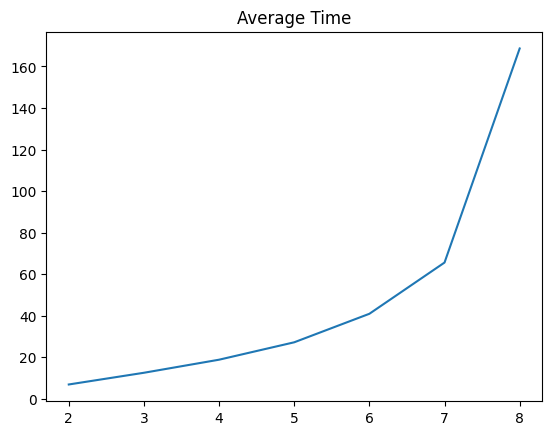

In [57]:
dimension = 8
avg_time = []
for i in range(dimension - 1):
        avg_time.append(np.mean(t[i]))
plt.plot(range(2, dimension + 1),avg_time)
plt.title("Average Time")
plt.show()


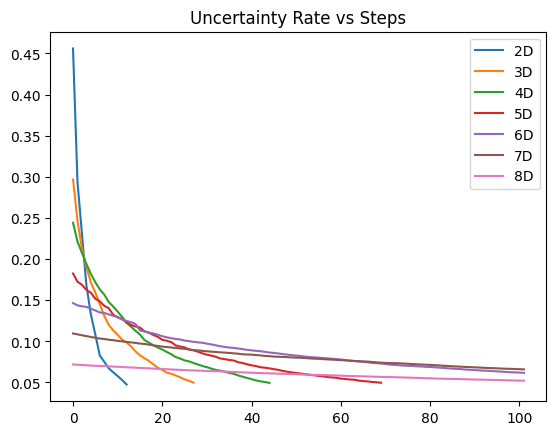

In [58]:
for i in range(dimension - 1):
    plt.plot(range(len(un[i])), un[i], label=f"{i+2}D")
plt.title("Uncertainty Rate vs Steps")
plt.legend()
plt.show()




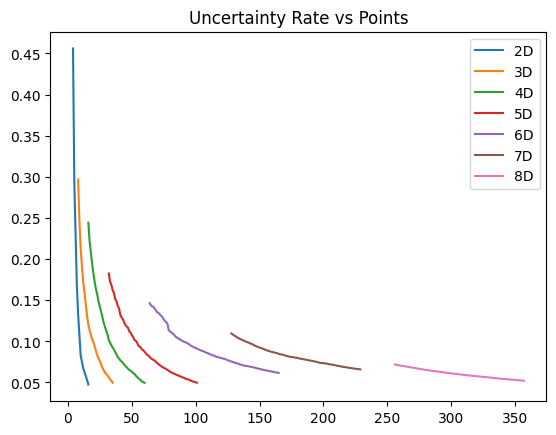

In [59]:
steps = []
for i in range(dimension - 1):
    steps.append([2**(i+2) + p for p in range(len(un[i]))])
    plt.plot(steps[i], un[i], label=f"{i+2}D")
plt.title("Uncertainty Rate vs Points")
plt.legend()
plt.show()

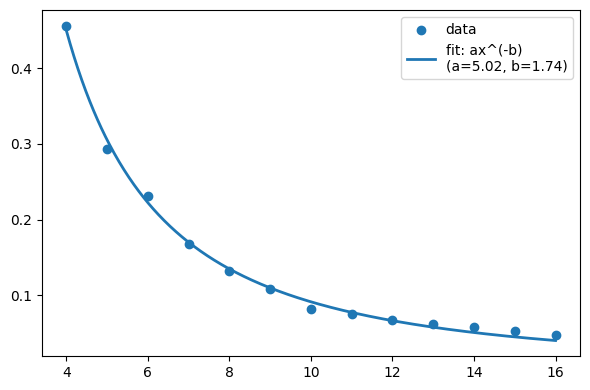

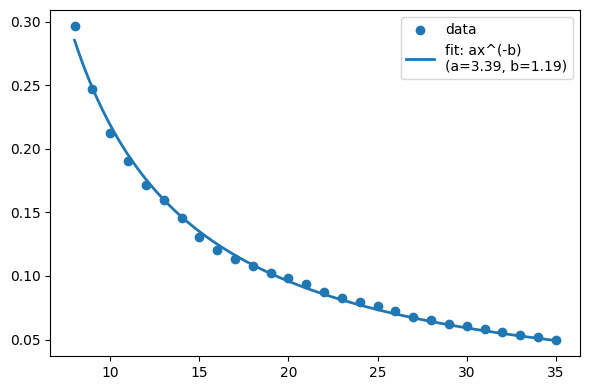

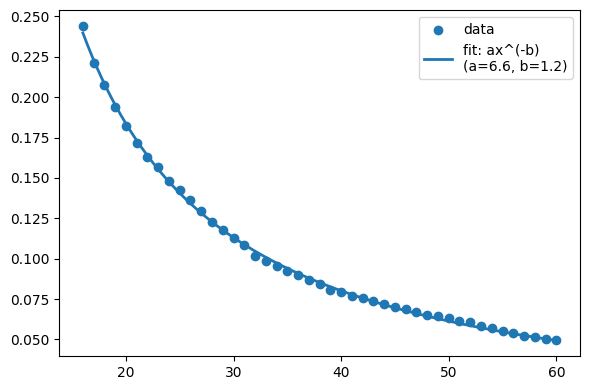

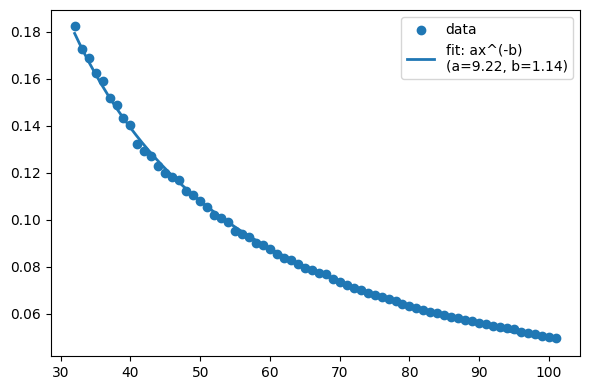

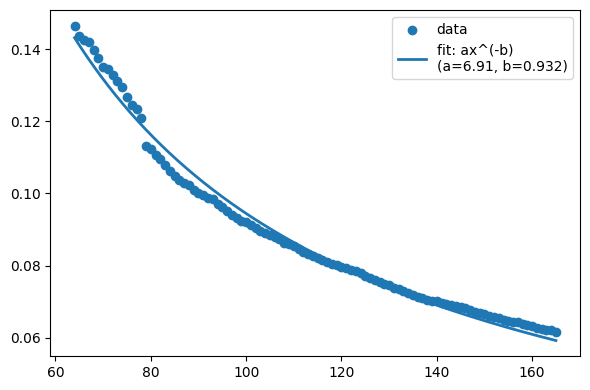

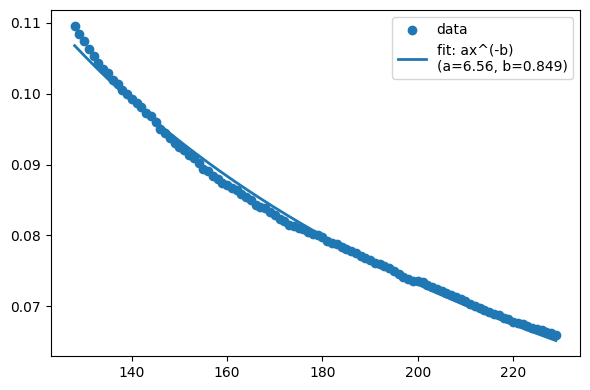

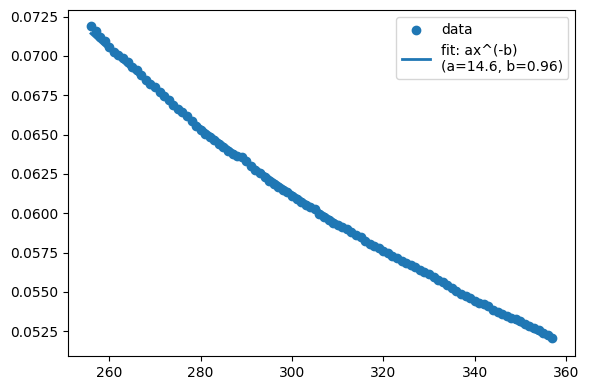

In [60]:
from scipy.optimize import curve_fit

def inv_with_offset(x, a, b):
    return a * x**(-b)
a = []
b = []
for i in range(dimension - 1):

    x = np.array(steps[i],dtype=float)
    y = np.array(un[i],dtype=float)

    p0 = [y[0] * x[0], y[-1]]
    popt, pcov = curve_fit(inv_with_offset, x, y, p0=p0, maxfev=5000)
    aa, bb = popt
    a.append(aa)
    b.append(bb)

    x_dense = np.linspace(x.min(), x.max(), 500)
    plt.figure(figsize=(6, 4))
    plt.scatter(x, y, label="data", zorder=3)
    plt.plot(x_dense, inv_with_offset(x_dense, *popt),
             label=f"fit: ax^(-b)\n(a={aa:.3g}, b={bb:.3g})",
             linewidth=2)
    plt.legend()
    plt.tight_layout()
    plt.show()

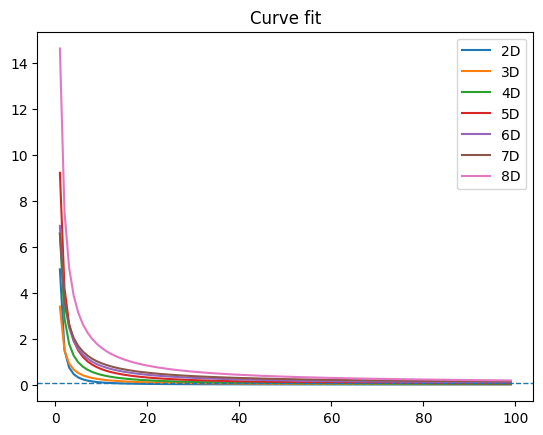

In [61]:
for i in range(dimension - 1):
    xxx = range(1,100)
    yyy = [a[i] * pp ** (-b[i]) for pp in xxx]
    plt.plot(xxx,yyy, label=f"{i+2}D")
plt.axhline(0.05, linestyle='--', linewidth=1)
plt.title("Curve fit")
plt.legend()
plt.show()
